In [1]:
# Thư viện cơ bản cho EDA (Exploratory Data Analysis)
import numpy as np # Thao tác với mảng số học
import pandas as pd # Xử lý dữ liệu, I/O cho CSV
import matplotlib.pyplot as plt # Vẽ biểu đồ
import seaborn as sns # Vẽ biểu đồ nâng cao
import matplotlib.ticker as mtick # Format trục trên biểu đồ

# Thư viện cho tiền xử lý và chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Thư viện cho chọn lựa đặc trưng (feature selection)
from sklearn.feature_selection import chi2

# Thư viện cho chia dữ liệu và fix mất cân bằng lớp
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

# Thư viện mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Thư viện đánh giá mô hình
from sklearn.metrics import (
    accuracy_score, roc_auc_score, mean_squared_error,
   classification_report,
    confusion_matrix,
    roc_curve, auc
)


### Read the dataset

In [2]:
df = pd.read_csv(r'data\diabetes\2015\diabetes_binary_health_indicators_BRFSS2015.csv')

print(df.shape)

(253680, 22)


In [3]:
df.head(100)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,30.0,1.0,0.0,9.0,2.0,3.0
96,1.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,0.0,3.0,0.0,0.0,3.0,5.0,3.0
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0
98,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,0.0,11.0,4.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Data Cleaning


In [5]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
# Check Duplicates
duplicates = df[df.duplicated()]

print(f'Duplicates: {len(duplicates)}')

duplicates.head()

Duplicates: 24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [7]:
# Convert datatypes to uint8 for model speed enhancement 

def clean_data(dataframe):
    
    df = (dataframe.drop_duplicates().reset_index(drop = True).astype({'Diabetes_binary':'uint8',
     'HighBP':'uint8',
     'HighChol':'uint8',
     'CholCheck':'uint8',
     'BMI':'uint8',
     'Smoker':'uint8',
     'Stroke':'uint8',
     'HeartDiseaseorAttack':'uint8',
     'PhysActivity':'uint8',
     'Fruits':'uint8',
     'Veggies':'uint8',
     'HvyAlcoholConsump':'uint8',
     'AnyHealthcare':'uint8',
     'NoDocbcCost':'uint8',
     'GenHlth':'uint8',
     'MentHlth':'uint8',
     'PhysHlth':'uint8',
     'DiffWalk':'uint8',
     'Sex':'uint8',
     'Age':'uint8',
     'Education':'uint8',
     'Income':'uint8',
     }))
    
    return df
    
cleaned_df = clean_data(df)



In [8]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  uint8
 1   HighBP                229474 non-null  uint8
 2   HighChol              229474 non-null  uint8
 3   CholCheck             229474 non-null  uint8
 4   BMI                   229474 non-null  uint8
 5   Smoker                229474 non-null  uint8
 6   Stroke                229474 non-null  uint8
 7   HeartDiseaseorAttack  229474 non-null  uint8
 8   PhysActivity          229474 non-null  uint8
 9   Fruits                229474 non-null  uint8
 10  Veggies               229474 non-null  uint8
 11  HvyAlcoholConsump     229474 non-null  uint8
 12  AnyHealthcare         229474 non-null  uint8
 13  NoDocbcCost           229474 non-null  uint8
 14  GenHlth               229474 non-null  uint8
 15  MentHlth              229474 non-n

In [9]:
cleaned_df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229474.0,0.152945,0.359936,0.0,0.0,0.0,0.0,1.0
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0


### Feature Selection

In [10]:
corr = (cleaned_df.drop('Diabetes_binary', axis = 1).corrwith(cleaned_df.Diabetes_binary).abs().sort_values(ascending = False))
corr

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
dtype: float64

In [11]:
corr[corr > 0.05]


GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
dtype: float64

### Apply Chi_square to find the relationship between categorical values

In [12]:
df_X = cleaned_df.drop('Diabetes_binary', axis = 1)
df_Y = cleaned_df['Diabetes_binary']

score = chi2(df_X, df_Y)

chi_square = pd.DataFrame(score).T.set_index(df_X.columns).rename(columns = {0: "Chi_Score", 1: "Chi_Pvalue"})
lst = chi_square.sort_values(by = 'Chi_Score', ascending = False)

print(lst)

                         Chi_Score     Chi_Pvalue
PhysHlth              97988.761672   0.000000e+00
BMI                   15507.736174   0.000000e+00
MentHlth              11419.584750   0.000000e+00
Age                    8539.906340   0.000000e+00
HighBP                 8098.548237   0.000000e+00
DiffWalk               7875.496177   0.000000e+00
GenHlth                7671.732832   0.000000e+00
HeartDiseaseorAttack   5822.145697   0.000000e+00
HighChol               4869.312739   0.000000e+00
Income                 3377.099257   0.000000e+00
Stroke                 2156.678382   0.000000e+00
HvyAlcoholConsump       937.401148  7.268457e-206
PhysActivity            617.563886  2.532822e-136
Education               479.112939  3.332472e-106
Smoker                  253.826098   3.804877e-57
Sex                     137.837135   7.910571e-32
NoDocbcCost              83.662830   5.867820e-20
Veggies                  82.098846   1.294482e-19
Fruits                   54.688897   1.412018e-13


In [13]:
## Select features which have the threshold above 250 Chi_score
chi_square[chi_square['Chi_Score'] > 250].index.to_list()

['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

### MODEL

In [14]:

# list of columns used from first exp (BMI group). Spoiler: better score for unseen dataset
cols_list = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']

X = df[cols_list]
y = df['Diabetes_binary']

#scaler
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [15]:
## Model Lists
clf_rdf = RandomForestClassifier(random_state=3)
clf_xgb = XGBClassifier(random_state=3)
clf_KNN = KNeighborsClassifier()
clf_gauss_nb = GaussianNB()
clf_ada = AdaBoostClassifier(random_state=3)
clf_lr = LogisticRegression(max_iter=500, random_state=3)
clf_gb = GradientBoostingClassifier(random_state=3)

In [16]:
def classifiers_models_test(X,y ,clf_names, clf_list):
    '''For a given list of classfier name_list and object_list,
     return model, ACC, AUC and RMSE Dataframe'''
    X_train, X_test, y_train, y_test = train_test_split(
    X, # predictive variables
    y, # target
    test_size=0.2, # portion of dataset to allocate to test set
    random_state=3, # we are setting the seed here
)

    info_clf = []
    for count, clf in enumerate(clf_list):

        clf.fit(X_train, y_train)

        # predict X_train
        y_pred = clf.predict(X_train)
        y_pred_proba = clf.predict_proba(X_train)[:,1]
        acc_score_xtr = accuracy_score(y_train, y_pred)
        auc_score_xtr = roc_auc_score(y_train,y_pred_proba)
        rmse_xtr = np.sqrt(mean_squared_error(y_train, y_pred))
        # predict X_test
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:,1]
        acc_score_xts = accuracy_score(y_test, y_pred)
        auc_score_xts = roc_auc_score(y_test,y_pred_proba)
        rmse_xts = np.sqrt(mean_squared_error(y_test, y_pred))
        info_clf.append([clf_names[count], acc_score_xtr, auc_score_xtr, rmse_xtr, acc_score_xts, auc_score_xts, rmse_xts])

        info_df = pd.DataFrame(info_clf, columns=['Model', 
                                                'train_Accuracy','train_AUC', 'train_RMSE', 
                                                'test_Accuracy','test_AUC', 'test_RMSE'])
    return info_df



### Undersampling (split 5050)

In [17]:
#show class sizes
df.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64

In [18]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = df['Diabetes_binary'] == 1
df_under_1 = df[is1]

#Get the 0s
is0 = df['Diabetes_binary'] == 0
df_under_0 = df[is0] 

#Select the 35346 random cases from the 0 (non-diabetes group)
df_under_0_rand1 = df_under_0.take(np.random.permutation(len(df_under_0))[:35346])

#Concate the 35346 1s to the 35346 randomly selected 0s
df_under = pd.concat([df_under_0_rand1, df_under_1], ignore_index=True)


In [19]:
df_under.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    35346
1.0    35346
dtype: int64

In [20]:
cols_list = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = df_under[cols_list]
y = df_under['Diabetes_binary']

#scaler
scaler = StandardScaler()
scaler.fit(X)



In [21]:
clf_names2 = ['RandomForest',  'XgBoost', 'GaussianNB', 'AdaBoostClassifier','LogisticRegression', 'GradientBoosting']
clf_list2 = [clf_rdf,  clf_xgb, clf_gauss_nb,clf_ada, clf_lr, clf_gb]
print()
under_perf = classifiers_models_test(X, y, clf_names2,clf_list2)
print('Undersampling')
under_perf


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Undersampling


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE
0,RandomForest,0.983591,0.998407,0.128099,0.724238,0.791320,0.525131
1,XgBoost,0.779357,0.867221,0.469726,0.742839,0.817961,0.507110
2,GaussianNB,0.702032,0.781866,0.545865,0.699130,0.783038,0.548516
3,AdaBoostClassifier,0.744505,0.823041,0.505465,0.745385,0.822568,0.504594
4,LogisticRegression,0.741764,0.817801,0.508169,0.743829,0.817636,0.506133
5,GradientBoosting,0.749722,0.828977,0.500278,0.750831,0.824882,0.499168


### Oversampling (SMOTE)

In [17]:
cols_list = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = df[cols_list]
y = df['Diabetes_binary']

#scaler
scaler = StandardScaler()
scaler.fit(X)



StandardScaler()

In [18]:
oversample = SMOTE(sampling_strategy=1, random_state=3)
X_resampled, y_resampled = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, # predictive variables
    y_resampled, # target
    test_size=0.2, # portion of dataset to allocate to test set
    random_state=3, # we are setting the seed here
)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Diabetes_binary
1.0     35346
0.0    218334
Name: count, dtype: int64



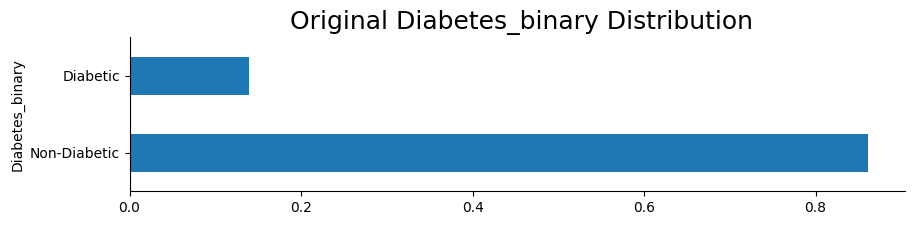


Diabetes_binary
1.0    174503
0.0    174831
Name: count, dtype: int64



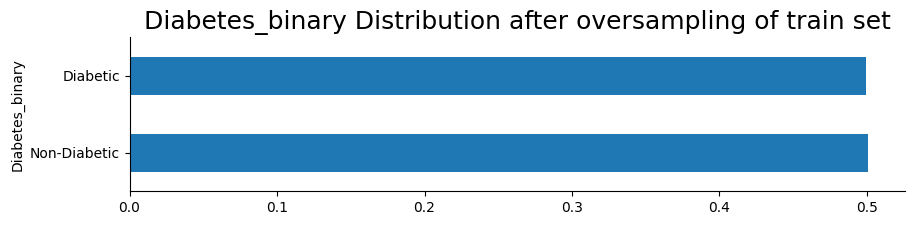

In [19]:
print(y.value_counts(ascending=True))
print()
y.value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title(' Original Diabetes_binary Distribution', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

print(y_train.value_counts(ascending=True))
print()
y_train.value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution after oversampling of train set', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);
plt.show()
print()

In [20]:
clf_names2 = ['RandomForest', 'XgBoost', 'GaussianNB','AdaBoostClassifier','LogisticRegression', 'GradientBoosting']
clf_list2 = [clf_rdf, clf_xgb, clf_gauss_nb,clf_ada, clf_lr, clf_gb]
print()
smote_perf = classifiers_models_test(X_resampled, y_resampled,clf_names2,clf_list2)
print('SMOTE')
smote_perf

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


SMOTE


,Model,train_Accuracy,train_AUC,train_RMSE,test_Accuracy,test_AUC,test_RMSE
0,RandomForest,0.989889,0.999271,0.100552,0.916527,0.969825,0.288916
1,XgBoost,0.915791,0.970364,0.290188,0.914936,0.968673,0.291658
2,GaussianNB,0.717348,0.788782,0.531650,0.715975,0.788416,0.532940
3,AdaBoostClassifier,0.851738,0.936793,0.385048,0.851478,0.937771,0.385385
4,LogisticRegression,0.752168,0.826620,0.497827,0.752880,0.826948,0.497112
5,GradientBoosting,0.883450,0.956610,0.341395,0.884581,0.957746,0.339734


##### RF và các Boosting ( XGB,Ada ,Gadient) trả về kết quả tốt hơn

### Hyperparameter tuning

In [30]:
grid_models = [ 
            (RandomForestClassifier(),[{'n_estimators':[100,150,200,250],'criterion':['gini','entropy']}]),
            (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1]}]),
            (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'loss':['log_loss', 'exponential'],'learning_rate':[0.1, 0.5, 0.8, 1]}]),
            (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [400,450,500],'min_child_weight': [3,4,5], 'max_depth': [2,3,4] }])]



In [31]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2,  error_score='raise')
    # grid = RandomizedSearchCV(i ,param_distributions=j ,  cv =2 , n_iter=10 , scoring = 'accuracy',n_jobs =-1 , error_score='raise')
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

RandomForestClassifier():
Best Accuracy : 90.73%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 250}

----------------



c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

AdaBoostClassifier():
Best Accuracy : 88.41%
Best Parameters :  {'learning_rate': 1, 'n_estimators': 200}

----------------



c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GradientBoostingClassifier():
Best Accuracy : 91.55%
Best Parameters :  {'learning_rate': 0.5, 'loss': 'log_loss', 'n_estimators': 200}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Best Accuracy : 91.16%
Best Parameters :  {'learning_rate': 0.1, 'max_depth': 4, 'min_

### Comparing Model before and after hyperparameter tuning

In [33]:
def compare_model_performance(X, y, models_with_params):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    pre_tuning_train_acc = []
    pre_tuning_test_acc = []
    post_tuning_train_acc = []
    post_tuning_test_acc = []

    for name, model, pre_params, post_params in models_with_params:
        # Huấn luyện mô hình với tham số trước tuning
        model.set_params(**pre_params)
        model.fit(X_train, y_train)
        pre_train_accuracy = accuracy_score(y_train, model.predict(X_train))
        pre_test_accuracy = accuracy_score(y_test, model.predict(X_test))
        pre_tuning_train_acc.append(pre_train_accuracy)
        pre_tuning_test_acc.append(pre_test_accuracy)
        print(f'{name} - Pre-tuning Train Accuracy: {pre_train_accuracy:.4f}, Test Accuracy: {pre_test_accuracy:.4f}')

        # Huấn luyện mô hình với tham số sau tuning
        model.set_params(**post_params)
        model.fit(X_train, y_train)
        post_train_accuracy = accuracy_score(y_train, model.predict(X_train))
        post_test_accuracy = accuracy_score(y_test, model.predict(X_test))
        post_tuning_train_acc.append(post_train_accuracy)
        post_tuning_test_acc.append(post_test_accuracy)
        print(f'{name} - Post-tuning Train Accuracy: {post_train_accuracy:.4f}, Test Accuracy: {post_test_accuracy:.4f}')

    # So sánh accuracy trước và sau tuning
    labels = [name for name, _, _, _ in models_with_params]
    x = range(len(labels))

    plt.figure(figsize=(12, 6))
    plt.bar(x, pre_tuning_test_acc, width=0.4, label='Pre-tuning Test Accuracy', align='center')
    plt.bar(x, post_tuning_test_acc, width=0.4, label='Post-tuning Test Accuracy', align='edge')
    plt.xticks(x, labels)
    plt.ylabel('Accuracy')
    plt.title('Comparison of Test Accuracy Before and After Tuning')
    plt.legend()
    plt.show()

RandomForest - Pre-tuning Train Accuracy: 0.9899, Test Accuracy: 0.9163
RandomForest - Post-tuning Train Accuracy: 0.9899, Test Accuracy: 0.9163


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Pre-tuning Train Accuracy: 0.8517, Test Accuracy: 0.8515


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Post-tuning Train Accuracy: 0.8850, Test Accuracy: 0.8853
GradientBoosting - Pre-tuning Train Accuracy: 0.8834, Test Accuracy: 0.8846
GradientBoosting - Post-tuning Train Accuracy: 0.9179, Test Accuracy: 0.9180
XGBoost - Pre-tuning Train Accuracy: 0.9158, Test Accuracy: 0.9149
XGBoost - Post-tuning Train Accuracy: 0.9139, Test Accuracy: 0.9150


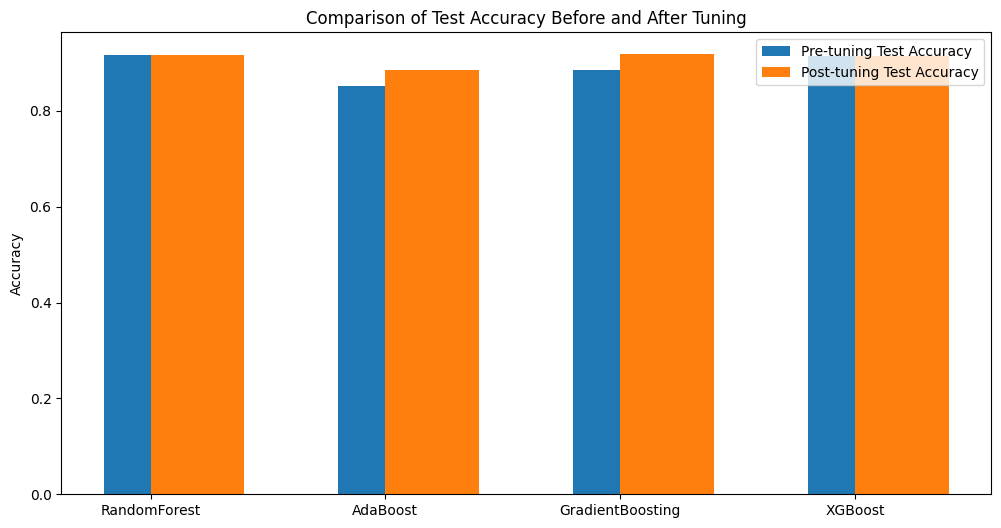

In [34]:
models_with_params = [
    ('RandomForest', RandomForestClassifier(), 
     {'random_state': 3},  # Tham số trước tuning
     {'criterion': 'entropy', 'n_estimators': 250}),  # Tham số sau tuning
    ('AdaBoost', AdaBoostClassifier(), 
     {'random_state': 3}, 
     {'learning_rate': 1, 'n_estimators': 200}),
    ('GradientBoosting', GradientBoostingClassifier(), 
     {'random_state': 3}, 
     {'learning_rate': 0.5, 'loss': 'log_loss', 'n_estimators': 200}),
    ('XGBoost', XGBClassifier(), 
     {'random_state': 3}, 
     {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 500})
]

# Gọi hàm để so sánh
compare_model_performance(X_resampled, y_resampled, models_with_params)

##### =>Ada vs Gradient Boosting sau tuning cho kết quả nhỉnh hơn một tí

#### Classification report and Confusion Matrix

In [38]:
# use the parameters after tuning 
models_with_params_new = [
    ('RandomForest', RandomForestClassifier(random_state=3)),
    ('AdaBoost', AdaBoostClassifier(learning_rate=1, n_estimators=200)),
    ('GradientBoosting', GradientBoostingClassifier(learning_rate=0.5, loss='log_loss', n_estimators=200)),
    ('XGBoost', XGBClassifier(random_state=3 ))
]

In [35]:
def evaluate_model_performance(y_true, y_pred, y_pred_proba=None, plot_confusion=True, plot_roc=True):

    # Classification report
    print("Classification Report:")
    report = classification_report(y_true, y_pred)
    print(report)
    
    # Confusion matrix
    if plot_confusion:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    
    # AUC score
    auc_score = None
    if y_pred_proba is not None:
        auc_score = roc_auc_score(y_true, y_pred_proba, multi_class="ovr") if len(np.unique(y_true)) > 2 else roc_auc_score(y_true, y_pred_proba)
        print(f"AUC Score: {auc_score:.4f}")

        # Plot ROC curve
        if plot_roc and len(np.unique(y_true)) == 2:
            fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.show()
    # RMSE calculation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE: {rmse:.4f}")
    
    return {
        "classification_report": report,
        "AUC": auc_score,
        "RMSE": rmse
    }


Evaluating model: RandomForest
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     43503
         1.0       0.95      0.89      0.91     43831

    accuracy                           0.92     87334
   macro avg       0.92      0.92      0.92     87334
weighted avg       0.92      0.92      0.92     87334



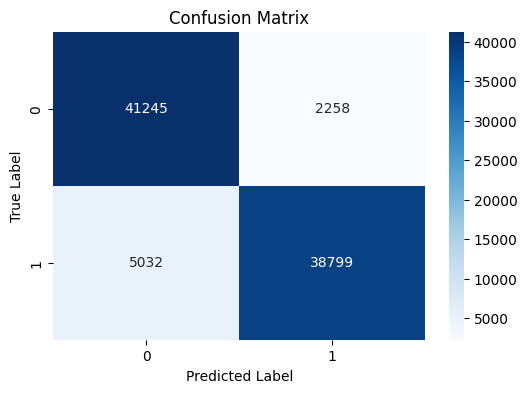

AUC Score: 0.9698


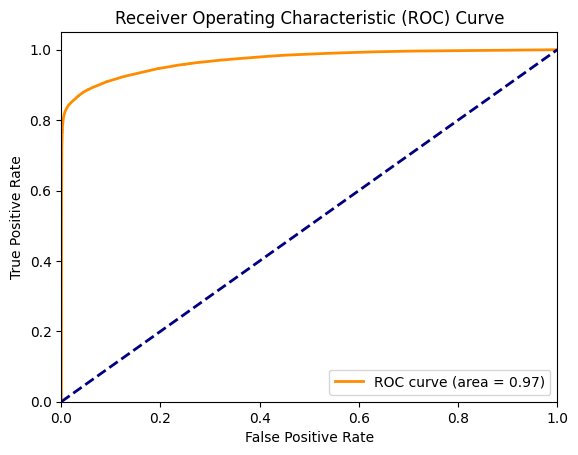

RMSE: 0.2889


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Evaluating model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     43503
         1.0       0.91      0.86      0.88     43831

    accuracy                           0.89     87334
   macro avg       0.89      0.89      0.89     87334
weighted avg       0.89      0.89      0.89     87334



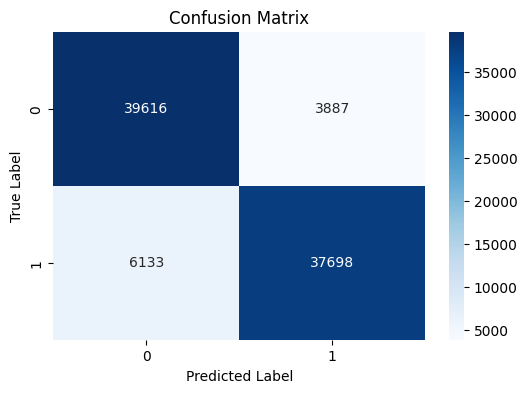

AUC Score: 0.9569


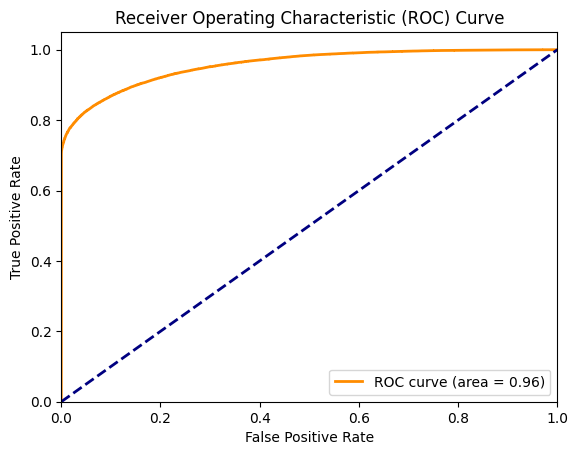

RMSE: 0.3387

Evaluating model: GradientBoosting
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43503
         1.0       0.97      0.86      0.91     43831

    accuracy                           0.92     87334
   macro avg       0.92      0.92      0.92     87334
weighted avg       0.92      0.92      0.92     87334



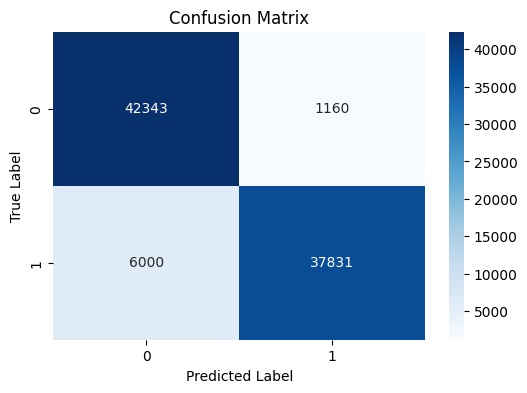

AUC Score: 0.9704


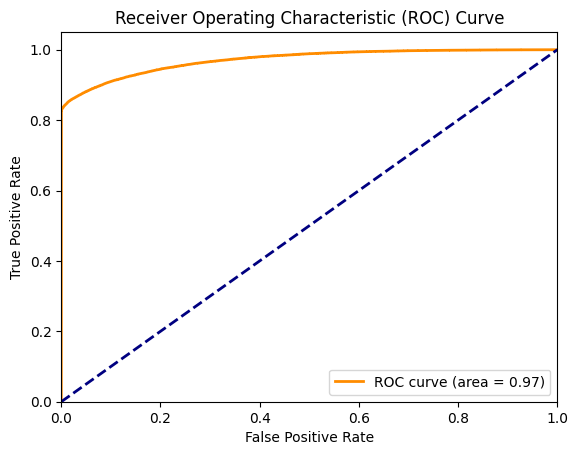

RMSE: 0.2863

Evaluating model: XGBoost
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     43503
         1.0       0.97      0.86      0.91     43831

    accuracy                           0.91     87334
   macro avg       0.92      0.92      0.91     87334
weighted avg       0.92      0.91      0.91     87334



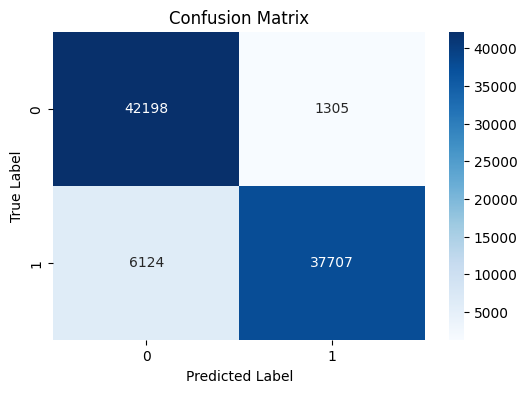

AUC Score: 0.9687


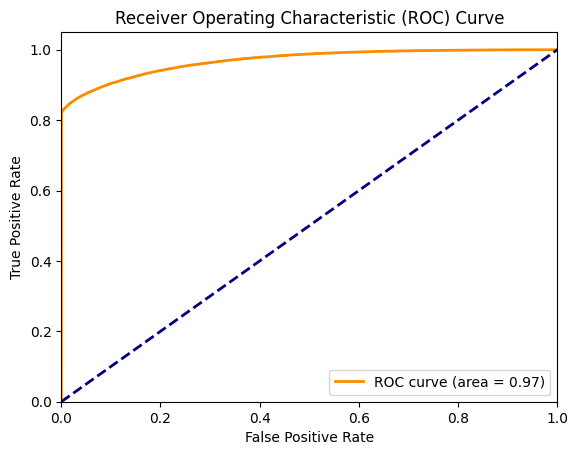

RMSE: 0.2917


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=3)

for name, model in models_with_params_new:
 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if len(y_test.shape) == 1 and len(set(y_test)) == 2 else None

    # Gọi hàm evaluate_model_performance
    print(f"\nEvaluating model: {name}")
    evaluate_model_performance(y_test, y_pred, y_pred_proba=y_pred_proba)

#### Feature Importance


In [24]:
# final model

rfc = RandomForestClassifier(random_state=3)
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=3)

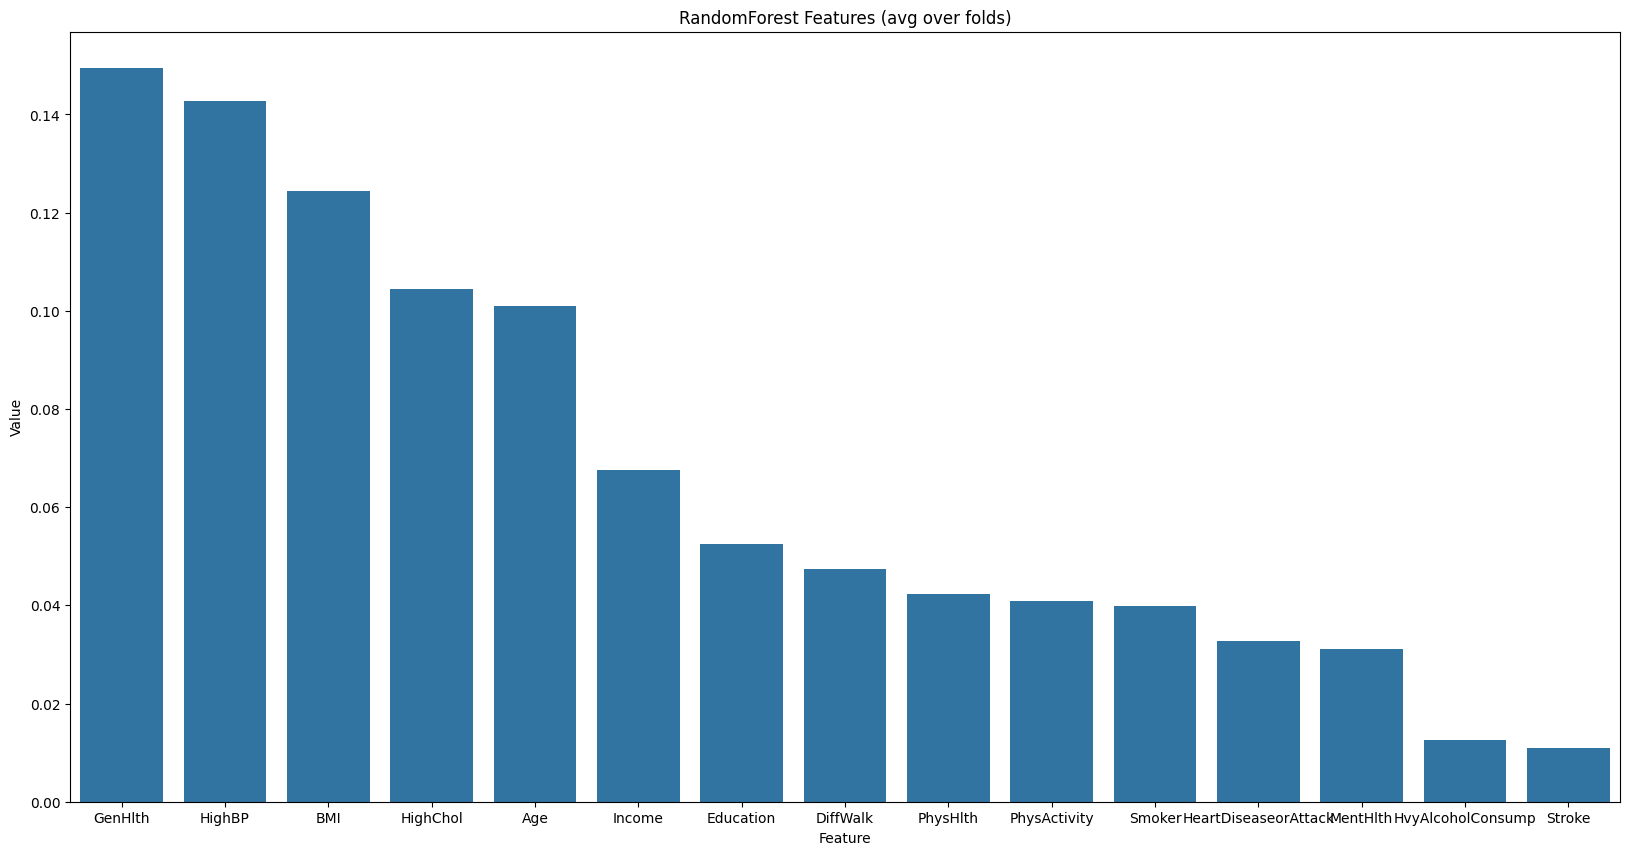

In [25]:
feature_imp = pd.DataFrame(sorted(zip(rfc.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Feature", y="Value", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RandomForest Features (avg over folds)')
plt.show()